<a href="https://colab.research.google.com/github/hern0384/GIS5571/blob/Final-project/Copy_of_Geoproceso_DH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cartographic** **Analysis**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import the geopandas and matplotlib libraries to geoprocess and graph spatial information.

import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns


In [8]:
# Ruta al archivo SHP
ruta_shape = ('/content/drive/MyDrive/Municipios/Municipios_Group.shp')

# Load shapefiles
Variables_Mx = (gpd.read_file(ruta_shape))
Variables_Mx.head()

,Id,MUNIG_ID,ADM1NAME,ADM2NAME,GRADO_RS,POP_DENS,POT_AGRIC,POZOS,RANK_WB,RANK_RIVE,geometry
0,0,1473.0,Baja California,Mexicali,1066.0,40738.78248,3.0,1.0,11.0,24.0,"POLYGON ((-115.81505 32.64088, -115.70466 32.6..."
1,0,1472.0,Baja California,Tecate,327.0,3984.10352,5.0,0.0,0.0,2.0,"POLYGON ((-116.73791 32.56703, -116.65926 32.5..."
2,0,1474.0,Baja California,Tijuana,311.0,197372.49792,2.0,0.0,0.0,2.0,"POLYGON ((-117.09481 32.41141, -117.09481 32.4..."
3,0,1617.0,Sonora,San Luis R?o Colorado,154.0,1653.32922,3.0,6.0,4.0,0.0,"POLYGON ((-114.81216 32.49430, -114.70179 32.4..."
4,0,1475.0,Baja California,Playas de Rosarito,209.0,16679.34464,4.0,0.0,0.0,0.0,"POLYGON ((-116.95031 32.24813, -116.95097 32.2..."


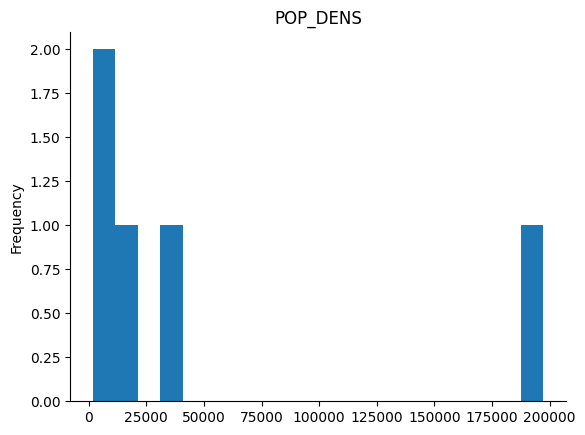

In [7]:
from matplotlib import pyplot as plt
_df_3['POP_DENS'].plot(kind='hist', bins=20, title='POP_DENS')
plt.gca().spines[['top', 'right',]].set_visible(False)

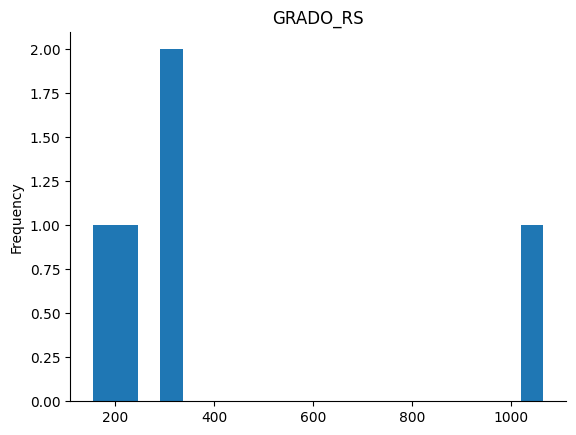

In [6]:
from matplotlib import pyplot as plt
_df_2['GRADO_RS'].plot(kind='hist', bins=20, title='GRADO_RS')
plt.gca().spines[['top', 'right',]].set_visible(False)

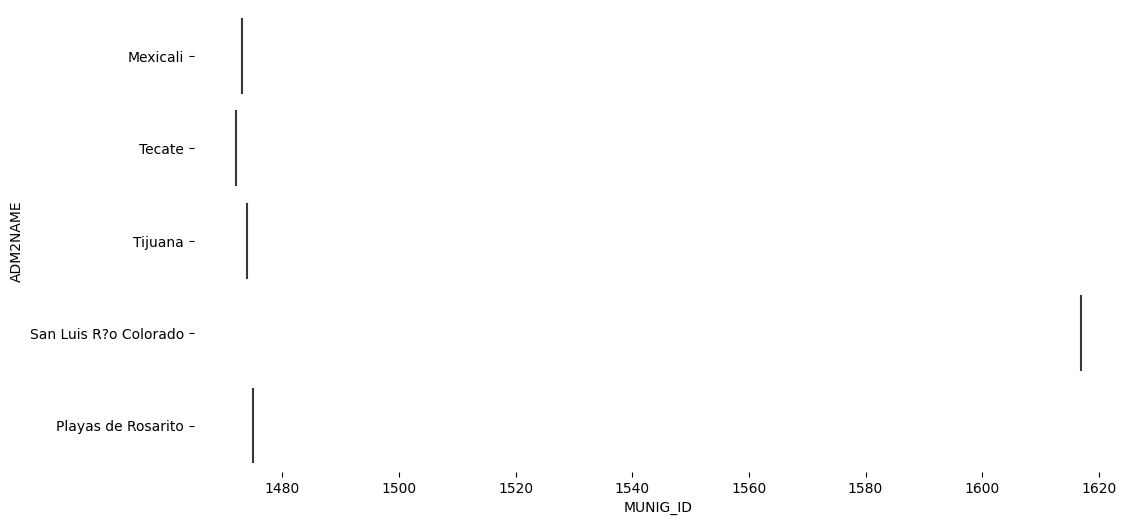

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['ADM2NAME'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='MUNIG_ID', y='ADM2NAME', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

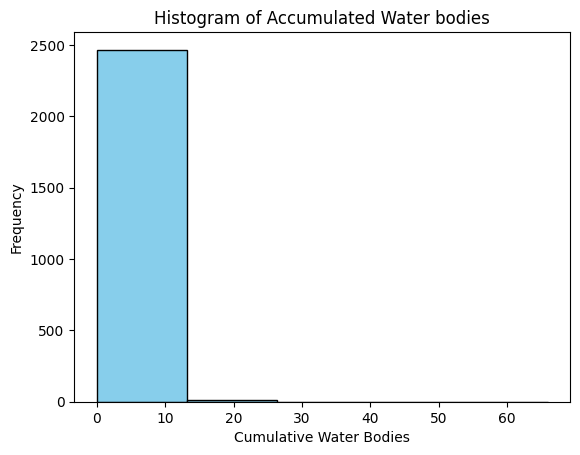

In [30]:
# Visualización del rezago social acumulado (en escala de 1-5) con frecuencias en cantidad de municipios

plt.hist(Variables_Mx['RANK_WB'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Cumulative Water Bodies')
plt.ylabel('Frequency')
plt.title('Histogram of Accumulated Water bodies')
plt.show()

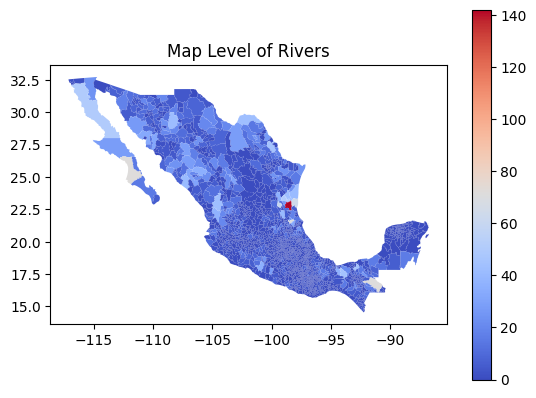

In [40]:
# Visualización cartográfica de la variable Grado de Rezago social (Opción 1)

Variables_Mx.plot(column='RANK_RIVE', cmap='coolwarm', legend=True)
plt.title('Map Level of Rivers')
plt.show()

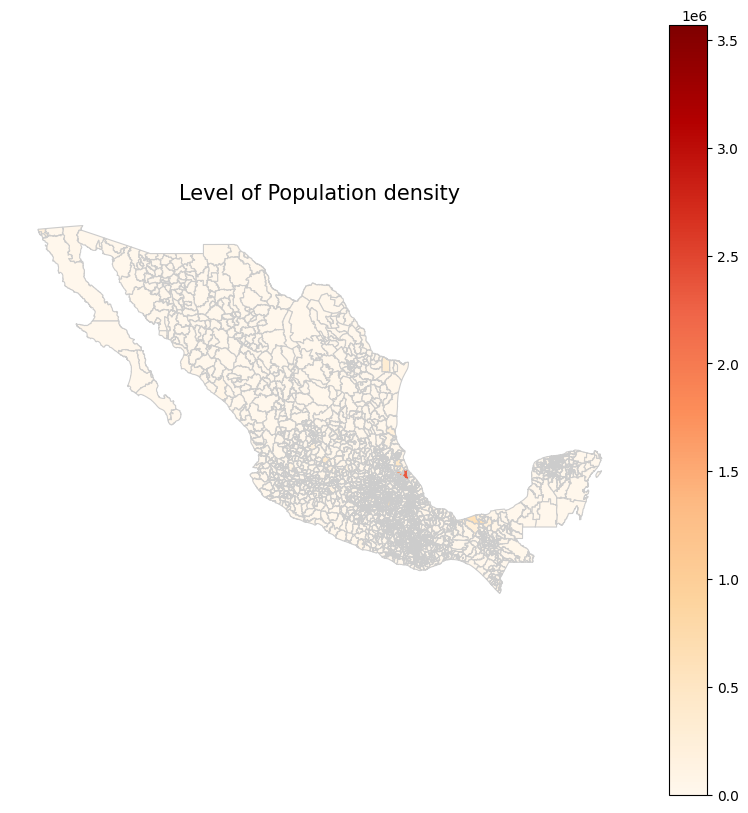

In [36]:
# Visualización cartográfica de la variable Grado de Rezago social (Opción 2)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Ajustar el color, titulo y leyenda de acuerdo a cada variable

Variables_Mx.plot(column='POP_DENS', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.title('Level of Population density', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.set_axis_off()

# Validación de leyenda antes de ajustar ubicación

if ax.get_legend():
    ax.get_legend().set_bbox_to_anchor((0.5, 0.6))

# Guardar el mapa
plt.savefig('mapa_prop_GRADO_RS.png', dpi=300)

plt.show()

# **Geostatistical** **Analysis**


In [42]:
########## Estandarizacion (normalización) de las variables ####################

# Normalizar la serie de datos a traves del calculo del Z-Score para cada variable

variables = ['GRADO_RS','POP_DENS','POT_AGRIC',
             'POZOS','RANK_WB','RANK_RIVE']

# Reinicia el índice si no es numérico
Variables_Mx.reset_index(drop=True, inplace=True)

# Calcular el Z-Score para cada variable y crea nuevas columnas
for var in variables:
    if var in Variables_Mx.columns:
        Variables_Mx[f'zscore_{var}'] = zscore(Variables_Mx[var])

# Ahora Variables_Mx contiene nuevas columnas con los valores Z-Score para cada variable

print(Variables_Mx.head())

   Id  MUNIG_ID         ADM1NAME               ADM2NAME  GRADO_RS  \
0   0    1473.0  Baja California               Mexicali    1066.0   
1   0    1472.0  Baja California                 Tecate     327.0   
2   0    1474.0  Baja California                Tijuana     311.0   
3   0    1617.0           Sonora  San Luis R?o Colorado     154.0   
4   0    1475.0  Baja California     Playas de Rosarito     209.0   

       POP_DENS  POT_AGRIC  POZOS  RANK_WB  RANK_RIVE  \
0   40738.78248        3.0    1.0     11.0       24.0   
1    3984.10352        5.0    0.0      0.0        2.0   
2  197372.49792        2.0    0.0      0.0        2.0   
3    1653.32922        3.0    6.0      4.0        0.0   
4   16679.34464        4.0    0.0      0.0        0.0   

                                            geometry  zscore_GRADO_RS  \
0  POLYGON ((-115.81505 32.64088, -115.70466 32.6...         4.681644   
1  POLYGON ((-116.73791 32.56703, -116.65926 32.5...         1.041491   
2  POLYGON ((-117.09481

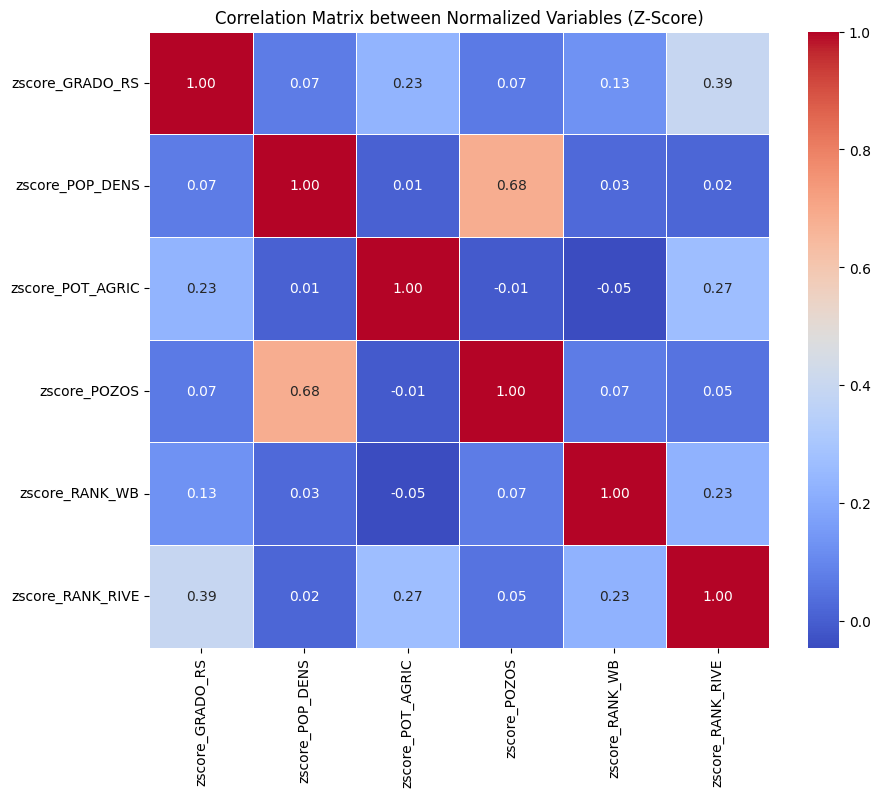

In [43]:
######## Analisis de correlación de las variables normalizadas #################


# Calcular la matriz de correlación entre las variables normalizadas

correlation_matrix = Variables_Mx[[f'zscore_{var}' for var in variables]].corr()

# Crear un mapa de calor (heatmap) de la matriz de correlación

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix between Normalized Variables (Z-Score)')
plt.show()

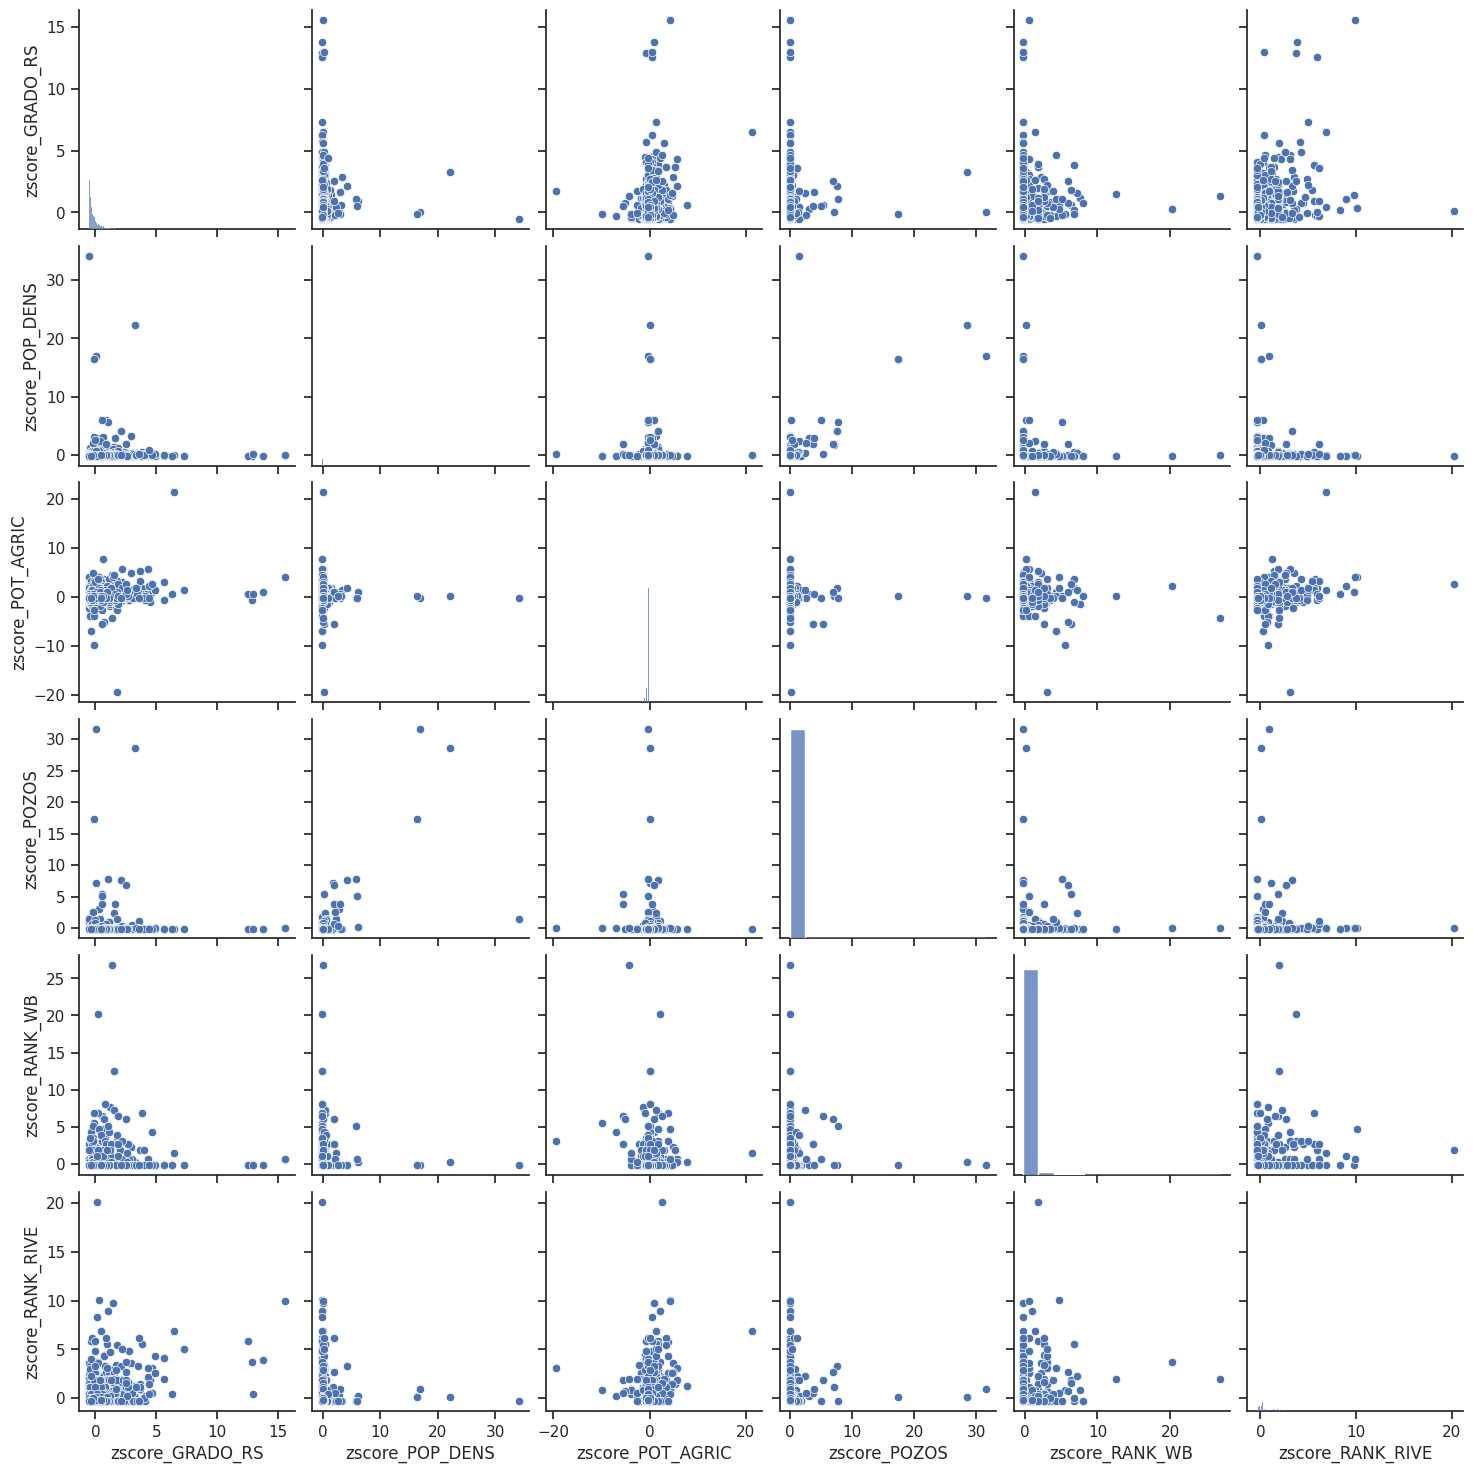

In [ ]:
############ Matriz de graficos de dispersión para Z-score  ####################

# Pair Plot

import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt


# Selecciona las columnas con Z-Scores
zscore_columns = [f'zscore_{var}' for var in variables]

# Elimina filas con geometrías nulas (si las hay)
Variables_Mx = Variables_Mx.dropna(subset=['geometry'])

# Verifica si hay geometrías en el GeoDataFrame
if Variables_Mx.empty or Variables_Mx.geometry.isnull().all():
    print("El GeoDataFrame no contiene geometrías válidas.")
else:
    # Crea una matriz de gráficos de dispersión para los Z-Scores
    sns.set(style="ticks")
    sns.pairplot(Variables_Mx[zscore_columns])
    plt.show()


In [44]:
%pip install esda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.0 MB/s eta 0:00:00


In [45]:
pip install --upgrade pysal esda


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 35.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.5/244.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.8/214.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
%pip install splot


<ipython-input-49-a6ff73938261>:23: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(Variables_Mx)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 23 disconnected components.
 There are 21 islands with ids: 72, 89, 274, 284, 557, 754, 1863, 1876, 1885, 1898, 1926, 1958, 1963, 2042, 2180, 2263, 2273, 2343, 2400, 2424, 2434.
  warnings.warn(message)


('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 274, ' is an island (no neighbors)')
('WARNING: ', 284, ' is an island (no neighbors)')
('WARNING: ', 557, ' is an island (no neighbors)')
('WARNING: ', 754, ' is an island (no neighbors)')
('WARNING: ', 1863, ' is an island (no neighbors)')
('WARNING: ', 1876, ' is an island (no neighbors)')
('WARNING: ', 1885, ' is an island (no neighbors)')
('WARNING: ', 1898, ' is an island (no neighbors)')
('WARNING: ', 1926, ' is an island (no neighbors)')
('WARNING: ', 1958, ' is an island (no neighbors)')
('WARNING: ', 1963, ' is an island (no neighbors)')
('WARNING: ', 2042, ' is an island (no neighbors)')
('WARNING: ', 2180, ' is an island (no neighbors)')
('WARNING: ', 2263, ' is an island (no neighbors)')
('WARNING: ', 2273, ' is an island (no neighbors)')
('WARNING: ', 2343, ' is an island (no neighbors)')
('WARNING: ', 2400, ' is an island (no neighbors)')
('WARNING: ', 2424, 

/usr/local/lib/python3.10/dist-packages/esda/moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
<ipython-input-49-a6ff73938261>:23: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(Variables_Mx)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 23 disconnected components.
 There are 21 islands with ids: 72, 89, 274, 284, 557, 754, 1863, 1876, 1885, 1898, 1926, 1958, 1963, 2042, 2180, 2263, 2273, 2343, 2400, 2424, 2434.
  warnings.warn(message)


('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 274, ' is an island (no neighbors)')
('WARNING: ', 284, ' is an island (no neighbors)')
('WARNING: ', 557, ' is an island (no neighbors)')
('WARNING: ', 754, ' is an island (no neighbors)')
('WARNING: ', 1863, ' is an island (no neighbors)')
('WARNING: ', 1876, ' is an island (no neighbors)')
('WARNING: ', 1885, ' is an island (no neighbors)')
('WARNING: ', 1898, ' is an island (no neighbors)')
('WARNING: ', 1926, ' is an island (no neighbors)')
('WARNING: ', 1958, ' is an island (no neighbors)')
('WARNING: ', 1963, ' is an island (no neighbors)')
('WARNING: ', 2042, ' is an island (no neighbors)')
('WARNING: ', 2180, ' is an island (no neighbors)')
('WARNING: ', 2263, ' is an island (no neighbors)')
('WARNING: ', 2273, ' is an island (no neighbors)')
('WARNING: ', 2343, ' is an island (no neighbors)')
('WARNING: ', 2400, ' is an island (no neighbors)')
('WARNING: ', 2424, 

/usr/local/lib/python3.10/dist-packages/esda/moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
<ipython-input-49-a6ff73938261>:23: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(Variables_Mx)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 23 disconnected components.
 There are 21 islands with ids: 72, 89, 274, 284, 557, 754, 1863, 1876, 1885, 1898, 1926, 1958, 1963, 2042, 2180, 2263, 2273, 2343, 2400, 2424, 2434.
  warnings.warn(message)


('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 274, ' is an island (no neighbors)')
('WARNING: ', 284, ' is an island (no neighbors)')
('WARNING: ', 557, ' is an island (no neighbors)')
('WARNING: ', 754, ' is an island (no neighbors)')
('WARNING: ', 1863, ' is an island (no neighbors)')
('WARNING: ', 1876, ' is an island (no neighbors)')
('WARNING: ', 1885, ' is an island (no neighbors)')
('WARNING: ', 1898, ' is an island (no neighbors)')
('WARNING: ', 1926, ' is an island (no neighbors)')
('WARNING: ', 1958, ' is an island (no neighbors)')
('WARNING: ', 1963, ' is an island (no neighbors)')
('WARNING: ', 2042, ' is an island (no neighbors)')
('WARNING: ', 2180, ' is an island (no neighbors)')
('WARNING: ', 2263, ' is an island (no neighbors)')
('WARNING: ', 2273, ' is an island (no neighbors)')
('WARNING: ', 2343, ' is an island (no neighbors)')
('WARNING: ', 2400, ' is an island (no neighbors)')
('WARNING: ', 2424, 

/usr/local/lib/python3.10/dist-packages/esda/moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
<ipython-input-49-a6ff73938261>:23: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(Variables_Mx)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 23 disconnected components.
 There are 21 islands with ids: 72, 89, 274, 284, 557, 754, 1863, 1876, 1885, 1898, 1926, 1958, 1963, 2042, 2180, 2263, 2273, 2343, 2400, 2424, 2434.
  warnings.warn(message)


('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 274, ' is an island (no neighbors)')
('WARNING: ', 284, ' is an island (no neighbors)')
('WARNING: ', 557, ' is an island (no neighbors)')
('WARNING: ', 754, ' is an island (no neighbors)')
('WARNING: ', 1863, ' is an island (no neighbors)')
('WARNING: ', 1876, ' is an island (no neighbors)')
('WARNING: ', 1885, ' is an island (no neighbors)')
('WARNING: ', 1898, ' is an island (no neighbors)')
('WARNING: ', 1926, ' is an island (no neighbors)')
('WARNING: ', 1958, ' is an island (no neighbors)')
('WARNING: ', 1963, ' is an island (no neighbors)')
('WARNING: ', 2042, ' is an island (no neighbors)')
('WARNING: ', 2180, ' is an island (no neighbors)')
('WARNING: ', 2263, ' is an island (no neighbors)')
('WARNING: ', 2273, ' is an island (no neighbors)')
('WARNING: ', 2343, ' is an island (no neighbors)')
('WARNING: ', 2400, ' is an island (no neighbors)')
('WARNING: ', 2424, 

/usr/local/lib/python3.10/dist-packages/esda/moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
<ipython-input-49-a6ff73938261>:23: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(Variables_Mx)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 23 disconnected components.
 There are 21 islands with ids: 72, 89, 274, 284, 557, 754, 1863, 1876, 1885, 1898, 1926, 1958, 1963, 2042, 2180, 2263, 2273, 2343, 2400, 2424, 2434.
  warnings.warn(message)


('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 274, ' is an island (no neighbors)')
('WARNING: ', 284, ' is an island (no neighbors)')
('WARNING: ', 557, ' is an island (no neighbors)')
('WARNING: ', 754, ' is an island (no neighbors)')
('WARNING: ', 1863, ' is an island (no neighbors)')
('WARNING: ', 1876, ' is an island (no neighbors)')
('WARNING: ', 1885, ' is an island (no neighbors)')
('WARNING: ', 1898, ' is an island (no neighbors)')
('WARNING: ', 1926, ' is an island (no neighbors)')
('WARNING: ', 1958, ' is an island (no neighbors)')
('WARNING: ', 1963, ' is an island (no neighbors)')
('WARNING: ', 2042, ' is an island (no neighbors)')
('WARNING: ', 2180, ' is an island (no neighbors)')
('WARNING: ', 2263, ' is an island (no neighbors)')
('WARNING: ', 2273, ' is an island (no neighbors)')
('WARNING: ', 2343, ' is an island (no neighbors)')
('WARNING: ', 2400, ' is an island (no neighbors)')
('WARNING: ', 2424, 

/usr/local/lib/python3.10/dist-packages/esda/moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
<ipython-input-49-a6ff73938261>:23: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(Variables_Mx)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 23 disconnected components.
 There are 21 islands with ids: 72, 89, 274, 284, 557, 754, 1863, 1876, 1885, 1898, 1926, 1958, 1963, 2042, 2180, 2263, 2273, 2343, 2400, 2424, 2434.
  warnings.warn(message)


('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 274, ' is an island (no neighbors)')
('WARNING: ', 284, ' is an island (no neighbors)')
('WARNING: ', 557, ' is an island (no neighbors)')
('WARNING: ', 754, ' is an island (no neighbors)')
('WARNING: ', 1863, ' is an island (no neighbors)')
('WARNING: ', 1876, ' is an island (no neighbors)')
('WARNING: ', 1885, ' is an island (no neighbors)')
('WARNING: ', 1898, ' is an island (no neighbors)')
('WARNING: ', 1926, ' is an island (no neighbors)')
('WARNING: ', 1958, ' is an island (no neighbors)')
('WARNING: ', 1963, ' is an island (no neighbors)')
('WARNING: ', 2042, ' is an island (no neighbors)')
('WARNING: ', 2180, ' is an island (no neighbors)')
('WARNING: ', 2263, ' is an island (no neighbors)')
('WARNING: ', 2273, ' is an island (no neighbors)')
('WARNING: ', 2343, ' is an island (no neighbors)')
('WARNING: ', 2400, ' is an island (no neighbors)')
('WARNING: ', 2424, 

/usr/local/lib/python3.10/dist-packages/esda/moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


Índices de Moran Local para zscore_GRADO_RS:
[12.04292857  4.21069158  2.56326768 ...  0.13430033 -0.36958654
  0.91797253]
Índices de Moran Local para zscore_POP_DENS:
[-0.02145847 -0.05186439 -0.05385709 ...  0.00666223 -0.01763401
 -0.01156861]
Índices de Moran Local para zscore_POT_AGRIC:
[7.64258075e+00 1.33586218e+01 4.50763272e+00 ... 1.16882316e-02
 3.64210084e-02 6.11537852e-02]
Índices de Moran Local para zscore_POZOS:
[0.00444405 0.00470343 0.00473645 ... 0.00476947 0.00476947 0.00476947]
Índices de Moran Local para zscore_RANK_WB:
[ 3.96549194 -0.32105304 -0.06401463 ...  0.02945389  0.02945389
  0.02945389]
Índices de Moran Local para zscore_RANK_RIVE:
[ 6.72415868e+00 -1.94797751e-01 -1.26823534e-01 ...  7.06774592e-02
  2.04539352e-02 -2.72291719e-03]


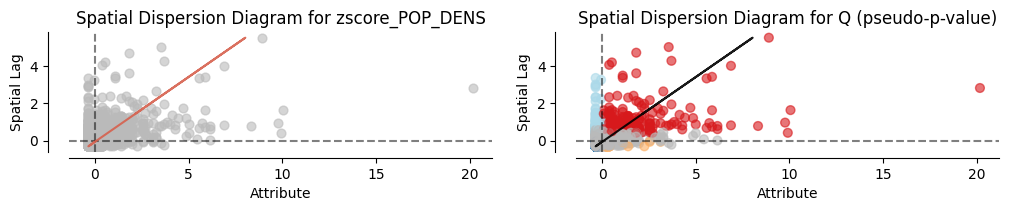

In [49]:
## Calculo del I de Moran por variable y grafica local y global por variable ###

## Utilizar la biblioteca PySAL (Python Spatial Analysis Library)

import numpy as np
from libpysal import weights
from esda.moran import Moran_Local
from splot.esda import moran_scatterplot

# Selecciona las columnas con Z-Scores
zscore_columns = [f'zscore_{var}' for var in variables]

# Elimina filas con geometrías nulas (si las hay)
Variables_Mx = Variables_Mx.dropna(subset=['geometry'])

# Verifica si hay geometrías en el GeoDataFrame
if Variables_Mx.empty or Variables_Mx.geometry.isnull().all():
    print("El GeoDataFrame no contiene geometrías válidas.")
else:
    # Calcula el índice de Moran Local para cada columna
    moran_local_indices = {}
    for col in zscore_columns:
        w = weights.Queen.from_dataframe(Variables_Mx)
        moran_local_obj = Moran_Local(Variables_Mx[col].values, w)
        moran_local_indices[col] = moran_local_obj.Is

    # Muestra los índices de Moran Local
    for col, moran_local_index in moran_local_indices.items():
        print(f'Índices de Moran Local para {col}:\n{moran_local_index}')

    # Visualiza un diagrama de dispersión espacial para una columna específica
    column_to_visualize = zscore_columns[1]
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    moran_scatterplot(moran_local_obj, ax=ax[0])
    ax[0].set_title(f'Spatial Dispersion Diagram for {column_to_visualize}')

    moran_scatterplot(moran_local_obj, p=0.05, ax=ax[1], zstandard=True)
    ax[1].set_title(f'Spatial Dispersion Diagram for Q (pseudo-p-value)')
    plt.show()


In [48]:
############### Resumen resultados I de Moran por variable #####################

import pandas as pd

# Crear un DataFrame para almacenar los índices de Moran locales
resumen_moran = pd.DataFrame()

# Iterar sobre las columnas con Z-Scores
for col in zscore_columns:
    w = weights.Queen.from_dataframe(Variables_Mx)
    moran_local_obj = Moran_Local(Variables_Mx[col].values, w)

    # Agregar los índices de Moran locales al DataFrame
    resumen_moran[col] = moran_local_obj.Is

print(resumen_moran)



<ipython-input-48-7577cb4998ba>:10: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(Variables_Mx)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 23 disconnected components.
 There are 21 islands with ids: 72, 89, 274, 284, 557, 754, 1863, 1876, 1885, 1898, 1926, 1958, 1963, 2042, 2180, 2263, 2273, 2343, 2400, 2424, 2434.
  warnings.warn(message)


('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 274, ' is an island (no neighbors)')
('WARNING: ', 284, ' is an island (no neighbors)')
('WARNING: ', 557, ' is an island (no neighbors)')
('WARNING: ', 754, ' is an island (no neighbors)')
('WARNING: ', 1863, ' is an island (no neighbors)')
('WARNING: ', 1876, ' is an island (no neighbors)')
('WARNING: ', 1885, ' is an island (no neighbors)')
('WARNING: ', 1898, ' is an island (no neighbors)')
('WARNING: ', 1926, ' is an island (no neighbors)')
('WARNING: ', 1958, ' is an island (no neighbors)')
('WARNING: ', 1963, ' is an island (no neighbors)')
('WARNING: ', 2042, ' is an island (no neighbors)')
('WARNING: ', 2180, ' is an island (no neighbors)')
('WARNING: ', 2263, ' is an island (no neighbors)')
('WARNING: ', 2273, ' is an island (no neighbors)')
('WARNING: ', 2343, ' is an island (no neighbors)')
('WARNING: ', 2400, ' is an island (no neighbors)')
('WARNING: ', 2424, 

/usr/local/lib/python3.10/dist-packages/esda/moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
<ipython-input-48-7577cb4998ba>:10: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(Variables_Mx)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 23 disconnected components.
 There are 21 islands with ids: 72, 89, 274, 284, 557, 754, 1863, 1876, 1885, 1898, 1926, 1958, 1963, 2042, 2180, 2263, 2273, 2343, 2400, 2424, 2434.
  warnings.warn(message)


('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 274, ' is an island (no neighbors)')
('WARNING: ', 284, ' is an island (no neighbors)')
('WARNING: ', 557, ' is an island (no neighbors)')
('WARNING: ', 754, ' is an island (no neighbors)')
('WARNING: ', 1863, ' is an island (no neighbors)')
('WARNING: ', 1876, ' is an island (no neighbors)')
('WARNING: ', 1885, ' is an island (no neighbors)')
('WARNING: ', 1898, ' is an island (no neighbors)')
('WARNING: ', 1926, ' is an island (no neighbors)')
('WARNING: ', 1958, ' is an island (no neighbors)')
('WARNING: ', 1963, ' is an island (no neighbors)')
('WARNING: ', 2042, ' is an island (no neighbors)')
('WARNING: ', 2180, ' is an island (no neighbors)')
('WARNING: ', 2263, ' is an island (no neighbors)')
('WARNING: ', 2273, ' is an island (no neighbors)')
('WARNING: ', 2343, ' is an island (no neighbors)')
('WARNING: ', 2400, ' is an island (no neighbors)')
('WARNING: ', 2424, 

/usr/local/lib/python3.10/dist-packages/esda/moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
<ipython-input-48-7577cb4998ba>:10: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(Variables_Mx)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 23 disconnected components.
 There are 21 islands with ids: 72, 89, 274, 284, 557, 754, 1863, 1876, 1885, 1898, 1926, 1958, 1963, 2042, 2180, 2263, 2273, 2343, 2400, 2424, 2434.
  warnings.warn(message)


('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 274, ' is an island (no neighbors)')
('WARNING: ', 284, ' is an island (no neighbors)')
('WARNING: ', 557, ' is an island (no neighbors)')
('WARNING: ', 754, ' is an island (no neighbors)')
('WARNING: ', 1863, ' is an island (no neighbors)')
('WARNING: ', 1876, ' is an island (no neighbors)')
('WARNING: ', 1885, ' is an island (no neighbors)')
('WARNING: ', 1898, ' is an island (no neighbors)')
('WARNING: ', 1926, ' is an island (no neighbors)')
('WARNING: ', 1958, ' is an island (no neighbors)')
('WARNING: ', 1963, ' is an island (no neighbors)')
('WARNING: ', 2042, ' is an island (no neighbors)')
('WARNING: ', 2180, ' is an island (no neighbors)')
('WARNING: ', 2263, ' is an island (no neighbors)')
('WARNING: ', 2273, ' is an island (no neighbors)')
('WARNING: ', 2343, ' is an island (no neighbors)')
('WARNING: ', 2400, ' is an island (no neighbors)')
('WARNING: ', 2424, 

/usr/local/lib/python3.10/dist-packages/esda/moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
<ipython-input-48-7577cb4998ba>:10: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(Variables_Mx)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 23 disconnected components.
 There are 21 islands with ids: 72, 89, 274, 284, 557, 754, 1863, 1876, 1885, 1898, 1926, 1958, 1963, 2042, 2180, 2263, 2273, 2343, 2400, 2424, 2434.
  warnings.warn(message)


('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 274, ' is an island (no neighbors)')
('WARNING: ', 284, ' is an island (no neighbors)')
('WARNING: ', 557, ' is an island (no neighbors)')
('WARNING: ', 754, ' is an island (no neighbors)')
('WARNING: ', 1863, ' is an island (no neighbors)')
('WARNING: ', 1876, ' is an island (no neighbors)')
('WARNING: ', 1885, ' is an island (no neighbors)')
('WARNING: ', 1898, ' is an island (no neighbors)')
('WARNING: ', 1926, ' is an island (no neighbors)')
('WARNING: ', 1958, ' is an island (no neighbors)')
('WARNING: ', 1963, ' is an island (no neighbors)')
('WARNING: ', 2042, ' is an island (no neighbors)')
('WARNING: ', 2180, ' is an island (no neighbors)')
('WARNING: ', 2263, ' is an island (no neighbors)')
('WARNING: ', 2273, ' is an island (no neighbors)')
('WARNING: ', 2343, ' is an island (no neighbors)')
('WARNING: ', 2400, ' is an island (no neighbors)')
('WARNING: ', 2424, 

/usr/local/lib/python3.10/dist-packages/esda/moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
<ipython-input-48-7577cb4998ba>:10: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(Variables_Mx)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 23 disconnected components.
 There are 21 islands with ids: 72, 89, 274, 284, 557, 754, 1863, 1876, 1885, 1898, 1926, 1958, 1963, 2042, 2180, 2263, 2273, 2343, 2400, 2424, 2434.
  warnings.warn(message)


('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 274, ' is an island (no neighbors)')
('WARNING: ', 284, ' is an island (no neighbors)')
('WARNING: ', 557, ' is an island (no neighbors)')
('WARNING: ', 754, ' is an island (no neighbors)')
('WARNING: ', 1863, ' is an island (no neighbors)')
('WARNING: ', 1876, ' is an island (no neighbors)')
('WARNING: ', 1885, ' is an island (no neighbors)')
('WARNING: ', 1898, ' is an island (no neighbors)')
('WARNING: ', 1926, ' is an island (no neighbors)')
('WARNING: ', 1958, ' is an island (no neighbors)')
('WARNING: ', 1963, ' is an island (no neighbors)')
('WARNING: ', 2042, ' is an island (no neighbors)')
('WARNING: ', 2180, ' is an island (no neighbors)')
('WARNING: ', 2263, ' is an island (no neighbors)')
('WARNING: ', 2273, ' is an island (no neighbors)')
('WARNING: ', 2343, ' is an island (no neighbors)')
('WARNING: ', 2400, ' is an island (no neighbors)')
('WARNING: ', 2424, 

/usr/local/lib/python3.10/dist-packages/esda/moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
<ipython-input-48-7577cb4998ba>:10: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(Variables_Mx)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 23 disconnected components.
 There are 21 islands with ids: 72, 89, 274, 284, 557, 754, 1863, 1876, 1885, 1898, 1926, 1958, 1963, 2042, 2180, 2263, 2273, 2343, 2400, 2424, 2434.
  warnings.warn(message)


('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 274, ' is an island (no neighbors)')
('WARNING: ', 284, ' is an island (no neighbors)')
('WARNING: ', 557, ' is an island (no neighbors)')
('WARNING: ', 754, ' is an island (no neighbors)')
('WARNING: ', 1863, ' is an island (no neighbors)')
('WARNING: ', 1876, ' is an island (no neighbors)')
('WARNING: ', 1885, ' is an island (no neighbors)')
('WARNING: ', 1898, ' is an island (no neighbors)')
('WARNING: ', 1926, ' is an island (no neighbors)')
('WARNING: ', 1958, ' is an island (no neighbors)')
('WARNING: ', 1963, ' is an island (no neighbors)')
('WARNING: ', 2042, ' is an island (no neighbors)')
('WARNING: ', 2180, ' is an island (no neighbors)')
('WARNING: ', 2263, ' is an island (no neighbors)')
('WARNING: ', 2273, ' is an island (no neighbors)')
('WARNING: ', 2343, ' is an island (no neighbors)')
('WARNING: ', 2400, ' is an island (no neighbors)')
('WARNING: ', 2424, 

/usr/local/lib/python3.10/dist-packages/esda/moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


<ipython-input-18-d282aa336d58>:16: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(Variables_Mx)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 23 disconnected components.
 There are 21 islands with ids: 72, 89, 274, 284, 557, 754, 1863, 1876, 1885, 1898, 1926, 1958, 1963, 2042, 2180, 2263, 2273, 2343, 2400, 2424, 2434.
  warnings.warn(message)


('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 274, ' is an island (no neighbors)')
('WARNING: ', 284, ' is an island (no neighbors)')
('WARNING: ', 557, ' is an island (no neighbors)')
('WARNING: ', 754, ' is an island (no neighbors)')
('WARNING: ', 1863, ' is an island (no neighbors)')
('WARNING: ', 1876, ' is an island (no neighbors)')
('WARNING: ', 1885, ' is an island (no neighbors)')
('WARNING: ', 1898, ' is an island (no neighbors)')
('WARNING: ', 1926, ' is an island (no neighbors)')
('WARNING: ', 1958, ' is an island (no neighbors)')
('WARNING: ', 1963, ' is an island (no neighbors)')
('WARNING: ', 2042, ' is an island (no neighbors)')
('WARNING: ', 2180, ' is an island (no neighbors)')
('WARNING: ', 2263, ' is an island (no neighbors)')
('WARNING: ', 2273, ' is an island (no neighbors)')
('WARNING: ', 2343, ' is an island (no neighbors)')
('WARNING: ', 2400, ' is an island (no neighbors)')
('WARNING: ', 2424, 

/usr/local/lib/python3.10/dist-packages/esda/moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
<ipython-input-18-d282aa336d58>:16: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(Variables_Mx)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 23 disconnected components.
 There are 21 islands with ids: 72, 89, 274, 284, 557, 754, 1863, 1876, 1885, 1898, 1926, 1958, 1963, 2042, 2180, 2263, 2273, 2343, 2400, 2424, 2434.
  warnings.warn(message)


('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 274, ' is an island (no neighbors)')
('WARNING: ', 284, ' is an island (no neighbors)')
('WARNING: ', 557, ' is an island (no neighbors)')
('WARNING: ', 754, ' is an island (no neighbors)')
('WARNING: ', 1863, ' is an island (no neighbors)')
('WARNING: ', 1876, ' is an island (no neighbors)')
('WARNING: ', 1885, ' is an island (no neighbors)')
('WARNING: ', 1898, ' is an island (no neighbors)')
('WARNING: ', 1926, ' is an island (no neighbors)')
('WARNING: ', 1958, ' is an island (no neighbors)')
('WARNING: ', 1963, ' is an island (no neighbors)')
('WARNING: ', 2042, ' is an island (no neighbors)')
('WARNING: ', 2180, ' is an island (no neighbors)')
('WARNING: ', 2263, ' is an island (no neighbors)')
('WARNING: ', 2273, ' is an island (no neighbors)')
('WARNING: ', 2343, ' is an island (no neighbors)')
('WARNING: ', 2400, ' is an island (no neighbors)')
('WARNING: ', 2424, 

/usr/local/lib/python3.10/dist-packages/esda/moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
<ipython-input-18-d282aa336d58>:16: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(Variables_Mx)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 23 disconnected components.
 There are 21 islands with ids: 72, 89, 274, 284, 557, 754, 1863, 1876, 1885, 1898, 1926, 1958, 1963, 2042, 2180, 2263, 2273, 2343, 2400, 2424, 2434.
  warnings.warn(message)


('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 274, ' is an island (no neighbors)')
('WARNING: ', 284, ' is an island (no neighbors)')
('WARNING: ', 557, ' is an island (no neighbors)')
('WARNING: ', 754, ' is an island (no neighbors)')
('WARNING: ', 1863, ' is an island (no neighbors)')
('WARNING: ', 1876, ' is an island (no neighbors)')
('WARNING: ', 1885, ' is an island (no neighbors)')
('WARNING: ', 1898, ' is an island (no neighbors)')
('WARNING: ', 1926, ' is an island (no neighbors)')
('WARNING: ', 1958, ' is an island (no neighbors)')
('WARNING: ', 1963, ' is an island (no neighbors)')
('WARNING: ', 2042, ' is an island (no neighbors)')
('WARNING: ', 2180, ' is an island (no neighbors)')
('WARNING: ', 2263, ' is an island (no neighbors)')
('WARNING: ', 2273, ' is an island (no neighbors)')
('WARNING: ', 2343, ' is an island (no neighbors)')
('WARNING: ', 2400, ' is an island (no neighbors)')
('WARNING: ', 2424, 

/usr/local/lib/python3.10/dist-packages/esda/moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
<ipython-input-18-d282aa336d58>:16: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(Variables_Mx)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 23 disconnected components.
 There are 21 islands with ids: 72, 89, 274, 284, 557, 754, 1863, 1876, 1885, 1898, 1926, 1958, 1963, 2042, 2180, 2263, 2273, 2343, 2400, 2424, 2434.
  warnings.warn(message)


('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 274, ' is an island (no neighbors)')
('WARNING: ', 284, ' is an island (no neighbors)')
('WARNING: ', 557, ' is an island (no neighbors)')
('WARNING: ', 754, ' is an island (no neighbors)')
('WARNING: ', 1863, ' is an island (no neighbors)')
('WARNING: ', 1876, ' is an island (no neighbors)')
('WARNING: ', 1885, ' is an island (no neighbors)')
('WARNING: ', 1898, ' is an island (no neighbors)')
('WARNING: ', 1926, ' is an island (no neighbors)')
('WARNING: ', 1958, ' is an island (no neighbors)')
('WARNING: ', 1963, ' is an island (no neighbors)')
('WARNING: ', 2042, ' is an island (no neighbors)')
('WARNING: ', 2180, ' is an island (no neighbors)')
('WARNING: ', 2263, ' is an island (no neighbors)')
('WARNING: ', 2273, ' is an island (no neighbors)')
('WARNING: ', 2343, ' is an island (no neighbors)')
('WARNING: ', 2400, ' is an island (no neighbors)')
('WARNING: ', 2424, 

/usr/local/lib/python3.10/dist-packages/esda/moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
<ipython-input-18-d282aa336d58>:16: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(Variables_Mx)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 23 disconnected components.
 There are 21 islands with ids: 72, 89, 274, 284, 557, 754, 1863, 1876, 1885, 1898, 1926, 1958, 1963, 2042, 2180, 2263, 2273, 2343, 2400, 2424, 2434.
  warnings.warn(message)


('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 274, ' is an island (no neighbors)')
('WARNING: ', 284, ' is an island (no neighbors)')
('WARNING: ', 557, ' is an island (no neighbors)')
('WARNING: ', 754, ' is an island (no neighbors)')
('WARNING: ', 1863, ' is an island (no neighbors)')
('WARNING: ', 1876, ' is an island (no neighbors)')
('WARNING: ', 1885, ' is an island (no neighbors)')
('WARNING: ', 1898, ' is an island (no neighbors)')
('WARNING: ', 1926, ' is an island (no neighbors)')
('WARNING: ', 1958, ' is an island (no neighbors)')
('WARNING: ', 1963, ' is an island (no neighbors)')
('WARNING: ', 2042, ' is an island (no neighbors)')
('WARNING: ', 2180, ' is an island (no neighbors)')
('WARNING: ', 2263, ' is an island (no neighbors)')
('WARNING: ', 2273, ' is an island (no neighbors)')
('WARNING: ', 2343, ' is an island (no neighbors)')
('WARNING: ', 2400, ' is an island (no neighbors)')
('WARNING: ', 2424, 

/usr/local/lib/python3.10/dist-packages/esda/moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
<ipython-input-18-d282aa336d58>:16: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(Variables_Mx)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 23 disconnected components.
 There are 21 islands with ids: 72, 89, 274, 284, 557, 754, 1863, 1876, 1885, 1898, 1926, 1958, 1963, 2042, 2180, 2263, 2273, 2343, 2400, 2424, 2434.
  warnings.warn(message)


('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 274, ' is an island (no neighbors)')
('WARNING: ', 284, ' is an island (no neighbors)')
('WARNING: ', 557, ' is an island (no neighbors)')
('WARNING: ', 754, ' is an island (no neighbors)')
('WARNING: ', 1863, ' is an island (no neighbors)')
('WARNING: ', 1876, ' is an island (no neighbors)')
('WARNING: ', 1885, ' is an island (no neighbors)')
('WARNING: ', 1898, ' is an island (no neighbors)')
('WARNING: ', 1926, ' is an island (no neighbors)')
('WARNING: ', 1958, ' is an island (no neighbors)')
('WARNING: ', 1963, ' is an island (no neighbors)')
('WARNING: ', 2042, ' is an island (no neighbors)')
('WARNING: ', 2180, ' is an island (no neighbors)')
('WARNING: ', 2263, ' is an island (no neighbors)')
('WARNING: ', 2273, ' is an island (no neighbors)')
('WARNING: ', 2343, ' is an island (no neighbors)')
('WARNING: ', 2400, ' is an island (no neighbors)')
('WARNING: ', 2424, 

/usr/local/lib/python3.10/dist-packages/esda/moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


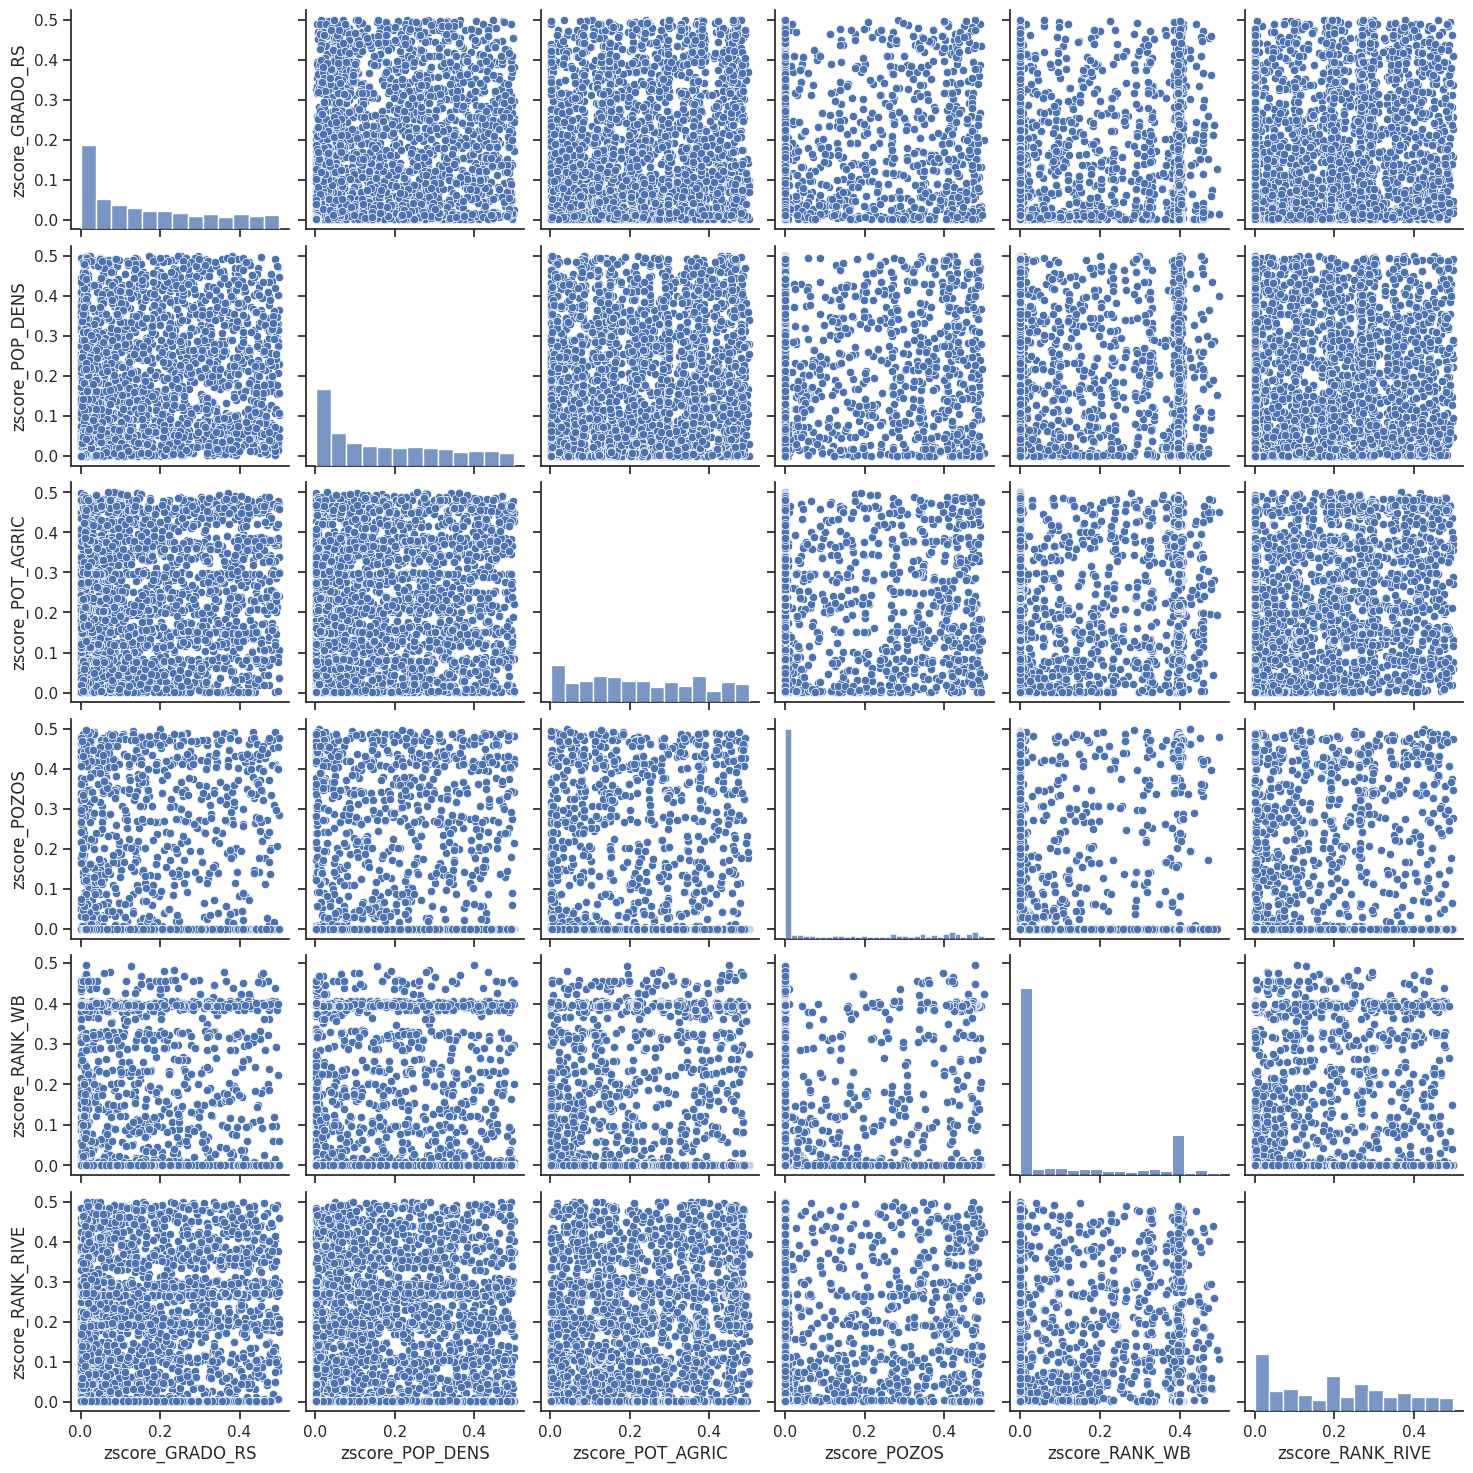

In [ ]:
################# Scatter Plots P-values I de Moran ############################

# Selecciona las columnas con Z-Scores
zscore_columns = [f'zscore_{var}' for var in variables]

# Elimina filas con geometrías nulas (si las hay)
Variables_Mx = Variables_Mx.dropna(subset=['geometry'])

# Verifica si hay geometrías en el GeoDataFrame
if Variables_Mx.empty or Variables_Mx.geometry.isnull().all():
    print("El GeoDataFrame no contiene geometrías válidas.")
else:
    # Calcula el índice de Moran Local para cada columna
    moran_local_indices = {}
    for col in zscore_columns:
        w = weights.Queen.from_dataframe(Variables_Mx)
        moran_local_obj = Moran_Local(Variables_Mx[col].values, w)
        moran_local_indices[col] = moran_local_obj.p_sim

    # Crear una matriz de gráficos de dispersión(scatter plots) para los p-values
    df_moran_pvalues = pd.DataFrame(moran_local_indices)
    sns.set(style="ticks")
    sns.pairplot(df_moran_pvalues)
    plt.show()
